In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

In [2]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

Data Wrangling

In [3]:
df = pd.read_csv("spotify_songs.csv", on_bad_lines='warn')
df.head(7)

track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   
5  7fvUMiyapMsRRxr07cU8Ef  Beautiful People (feat. Khalid) - Jack Wins Remix   
6  2OAylPUDDfwRGfe0lYqlCQ                    Never Really Over - R3HAB Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   
5        Ed Sheeran                67  2yiy9cd2QktrNvWC2EUi0k   
6        Katy Perry                62  7INHYSeusaFlyrHSNxm8qH   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   
3                        Call You Mine - The Remixes               2019-07-19   
4            Someone You Loved (Future Humans Remix)               2019-03-05   
5  Beautiful People (feat. Khalid) [Jack Wins Remix]               2019-07-11   
6                    Never Really Over (R3HAB Remix)               2019-07-26   

  playlist_name             playlist_id playlist_genre playlist_subgenre  \
0     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
1     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
2     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
3     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
4     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
5     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
6     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.748   0.916    6    -2.634     1       0.0583        0.1020   
1         0.726   0.815   11    -4.969     1       0.0373        0.0724   
2         0.675   0.931    1    -3.432     0       0.0742        0.0794   
3         0.718   0.930    7    -3.778     1       0.1020        0.0287   
4         0.650   0.833    1    -4.672     1       0.0359        0.0803   
5         0.675   0.919    8    -5.385     1       0.1270        0.0799   
6         0.449   0.856    5    -4.788     0       0.0623        0.1870   

   instrumentalness  liveness  valence    tempo  duration_ms  
0          0.000000    0.0653    0.518  122.036       194754  
1          0.004210    0.3570    0.693   99.972       162600  
2          0.000023    0.1100    0.613  124.008       176616  
3          0.000009    0.2040    0.277  121.956       169093  
4          0.000000    0.0833    0.725  123.976       189052  
5          0.000000    0.1430    0.585  124.982       163049  
6          0.000000    0.1760    0.152  112.648       187675

In [4]:
print('Jumlah baris :', len(df))
print('Jumlah kolom :', len(df.columns))

Jumlah baris : 32833
Jumlah kolom : 23


In [5]:
print('Ringkasan data :')
df.info()

Ringkasan data :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  in

In [6]:
print('Statistik deskriptif :')
df.describe(include='all')

Statistik deskriptif :


track_id track_name   track_artist  track_popularity  \
count                    32833      32828          32828      32833.000000   
unique                   28356      23449          10692               NaN   
top     7BKLCZ1jbUBVqRi2FVlTVw     Poison  Martin Garrix               NaN   
freq                        10         22            161               NaN   
mean                       NaN        NaN            NaN         42.477081   
std                        NaN        NaN            NaN         24.984074   
min                        NaN        NaN            NaN          0.000000   
25%                        NaN        NaN            NaN         24.000000   
50%                        NaN        NaN            NaN         45.000000   
75%                        NaN        NaN            NaN         62.000000   
max                        NaN        NaN            NaN        100.000000   

                track_album_id track_album_name track_album_release_date  \
count                    32833            32828                    32833   
unique                   22545            19743                     4530   
top     5L1xcowSxwzFUSJzvyMp48    Greatest Hits               2020-01-10   
freq                        42              139                      270   
mean                       NaN              NaN                      NaN   
std                        NaN              NaN                      NaN   
min                        NaN              NaN                      NaN   
25%                        NaN              NaN                      NaN   
50%                        NaN              NaN                      NaN   
75%                        NaN              NaN                      NaN   
max                        NaN              NaN                      NaN   

          playlist_name             playlist_id playlist_genre  \
count             32833                   32833          32833   
unique              449                     471              6   
top     Indie Poptimism  4JkkvMpVl4lSioqQjeAL0q            edm   
freq                308                     247           6043   
mean                NaN                     NaN            NaN   
std                 NaN                     NaN            NaN   
min                 NaN                     NaN            NaN   
25%                 NaN                     NaN            NaN   
50%                 NaN                     NaN            NaN   
75%                 NaN                     NaN            NaN   
max                 NaN                     NaN            NaN   

                playlist_subgenre  danceability        energy           key  \
count                       32833  32833.000000  32833.000000  32833.000000   
unique                         24           NaN           NaN           NaN   
top     progressive electro house           NaN           NaN           NaN   
freq                         1809           NaN           NaN           NaN   
mean                          NaN      0.654850      0.698619      5.374471   
std                           NaN      0.145085      0.180910      3.611657   
min                           NaN      0.000000      0.000175      0.000000   
25%                           NaN      0.563000      0.581000      2.000000   
50%                           NaN      0.672000      0.721000      6.000000   
75%                           NaN      0.761000      0.840000      9.000000   
max                           NaN      0.983000      1.000000     11.000000   

            loudness          mode   speechiness  acousticness  \
count   32833.000000  32833.000000  32833.000000  32833.000000   
unique           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN   
mean       -6.719499      0.565711      0.107068      0.175334   
std         2.988436      0.495671

In [7]:
df = df.copy()
df.fillna({'track_popularity': df['track_popularity'].mean(),
            'explicit': False}, inplace=True)

In [8]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [9]:
df['duration_minutes'] = df['duration_ms'] / 60000

In [10]:
df['energy_loudness_ratio'] = df['energy'] / (np.abs(df['loudness']) + 1)

In [11]:
filtered_df = df[df['track_popularity'] > 50]
grouped = filtered_df.groupby('track_artist')['track_popularity'].mean().sort_values(ascending=False)

In [12]:
print('Rata-rata popularity per artis (popularity > 50) :')
print(grouped)

Rata-rata popularity per artis (popularity > 50) :
track_artist
Trevor Daniel          97.000000
Y2K                    91.000000
Don Toliver            90.714286
Roddy Ricch            88.210526
DaBaby                 87.857143
                         ...    
Project Pat            51.000000
Play-N-Skillz          51.000000
Raja Kumari            51.000000
Ran-D                  51.000000
Ready For The World    51.000000
Name: track_popularity, Length: 4083, dtype: float64


data cleaning

In [13]:
df = df.copy()
df.fillna({'track_popularity': df['track_popularity'].median(),
            'explicit': False}, inplace=True)

In [14]:
print("Jumlah duplikat:", df.duplicated().sum())

Jumlah duplikat: 0


In [15]:
df = df.drop_duplicates().reset_index(drop=True)

In [16]:
Q1 = df.select_dtypes(['number']).quantile(0.25)
Q3 = df.select_dtypes(['number']).quantile(0.75)
IQR = Q3 - Q1
filtered_df = df[~((df.select_dtypes(['number']) < (Q1 - 1.5 * IQR)) | (df.select_dtypes(['number']) > (Q3 + 1.5 * IQR))).any(axis=1)]

In [17]:
filtered_df = filtered_df.copy()
filtered_df['duration_minutes'] = filtered_df['duration_ms'] / 60000
filtered_df['energy_loudness_ratio'] = filtered_df['energy'] / (np.abs(filtered_df['loudness']) + 1)

In [18]:
print('Jumlah baris after cleaning :', len(filtered_df))
print('Ringkasan data :')
filtered_df.describe(include='all')

Jumlah baris after cleaning : 18816
Ringkasan data :


track_id track_name      track_artist  track_popularity  \
count                    18816      18813             18813      18816.000000   
unique                   15784      13252              6612               NaN   
top     7BKLCZ1jbUBVqRi2FVlTVw      Alive  The Chainsmokers               NaN   
freq                        10         18               110               NaN   
mean                       NaN        NaN               NaN         45.566220   
std                        NaN        NaN               NaN         25.043252   
min                        NaN        NaN               NaN          0.000000   
25%                        NaN        NaN               NaN         29.000000   
50%                        NaN        NaN               NaN         49.000000   
75%                        NaN        NaN               NaN         65.000000   
max                        NaN        NaN               NaN         99.000000   

                track_album_id track_album_name track_album_release_date  \
count                    18816            18813                    18816   
unique                   13178            11764                     3341   
top     5L1xcowSxwzFUSJzvyMp48    Greatest Hits               2019-12-06   
freq                        21               77                      151   
mean                       NaN              NaN                      NaN   
std                        NaN              NaN                      NaN   
min                        NaN              NaN                      NaN   
25%                        NaN              NaN                      NaN   
50%                        NaN              NaN                      NaN   
75%                        NaN              NaN                      NaN   
max                        NaN              NaN                      NaN   

          playlist_name             playlist_id playlist_genre  \
count             18816                   18816          18816   
unique              443                     465              6   
top     Indie Poptimism  4JkkvMpVl4lSioqQjeAL0q            pop   
freq                236                     178           3740   
mean                NaN                     NaN            NaN   
std                 NaN                     NaN            NaN   
min                 NaN                     NaN            NaN   
25%                 NaN                     NaN            NaN   
50%                 NaN                     NaN            NaN   
75%                 NaN                     NaN            NaN   
max                 NaN                     NaN            NaN   

       playlist_subgenre  danceability        energy           key  \
count              18816  18816.000000  18816.000000  18816.000000   
unique                24           NaN           NaN           NaN   
top              pop edm           NaN           NaN           NaN   
freq                1099           NaN           NaN           NaN   
mean                 NaN      0.665973      0.710765      5.347842   
std                  NaN      0.135366      0.148729      3.607197   
min                  NaN      0.266000      0.199000      0.000000   
25%                  NaN      0.576000      0.609000      2.000000   
50%                  NaN      0.680000      0.725500      6.000000   
75%                  NaN      0.765000      0.826250      8.000000   
max                  NaN      0.979000      0.999000     11.000000   

            loudness          mode   speechiness  acousticness  \
count   18816.000000  18816.000000  18816.000000  18816.000000   
unique           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN   
mean       -6.175326      0.573501      0.084256      0.142763   
std         2.219612      0.494581      0.060806      0.154456   
min       -13.454000      0.000000      

In [19]:
num_cols = ['track_popularity', 'danceability', 'energy', 'loudness', 
            'speechiness', 'acousticness', 'instrumentalness', 
            'liveness', 'valence', 'tempo', 'duration_ms']

print("Descriptive statistics for numerical features:")
df[num_cols].describe().T

Descriptive statistics for numerical features:


count           mean           std          min  \
track_popularity  32833.0      42.477081     24.984074     0.000000   
danceability      32833.0       0.654850      0.145085     0.000000   
energy            32833.0       0.698619      0.180910     0.000175   
loudness          32833.0      -6.719499      2.988436   -46.448000   
speechiness       32833.0       0.107068      0.101314     0.000000   
acousticness      32833.0       0.175334      0.219633     0.000000   
instrumentalness  32833.0       0.084747      0.224230     0.000000   
liveness          32833.0       0.190176      0.154317     0.000000   
valence           32833.0       0.510561      0.233146     0.000000   
tempo             32833.0     120.881132     26.903624     0.000000   
duration_ms       32833.0  225799.811622  59834.006182  4000.000000   

                          25%            50%           75%         max  
track_popularity      24.0000      45.000000      62.00000     100.000  
danceability           0.5630       0.672000       0.76100       0.983  
energy                 0.5810       0.721000       0.84000       1.000  
loudness              -8.1710      -6.166000      -4.64500       1.275  
speechiness            0.0410       0.062500       0.13200       0.918  
acousticness           0.0151       0.080400       0.25500       0.994  
instrumentalness       0.0000       0.000016       0.00483       0.994  
liveness               0.0927       0.127000       0.24800       0.996  
valence                0.3310       0.512000       0.69300       0.991  
tempo                 99.9600     121.984000     133.91800     239.440  
duration_ms       187819.0000  216000.000000  253585.00000  517810.000

In [20]:
cat_cols = ['playlist_genre', 'playlist_subgenre', 'mode', 'key']
print("\nValue counts for categorical features:")
for col in cat_cols:
    print(f"\n{col}:")
    print(df[col].value_counts(normalize=True))


Value counts for categorical features:

playlist_genre:
playlist_genre
edm      0.184053
rap      0.175007
pop      0.167728
r&b      0.165413
latin    0.157007
rock     0.150793
Name: proportion, dtype: float64

playlist_subgenre:
playlist_subgenre
progressive electro house    0.055097
southern hip hop             0.051016
indie poptimism              0.050924
latin hip hop                0.050437
neo soul                     0.049858
pop edm                      0.046204
electro house                0.046021
hard rock                    0.045229
gangster rap                 0.044407
electropop                   0.042884
urban contemporary           0.042792
hip hop                      0.040264
dance pop                    0.039533
classic rock                 0.039472
trap                         0.039320
tropical                     0.039229
latin pop                    0.038437
hip pop                      0.038254
big room                     0.036731
new jack swing             

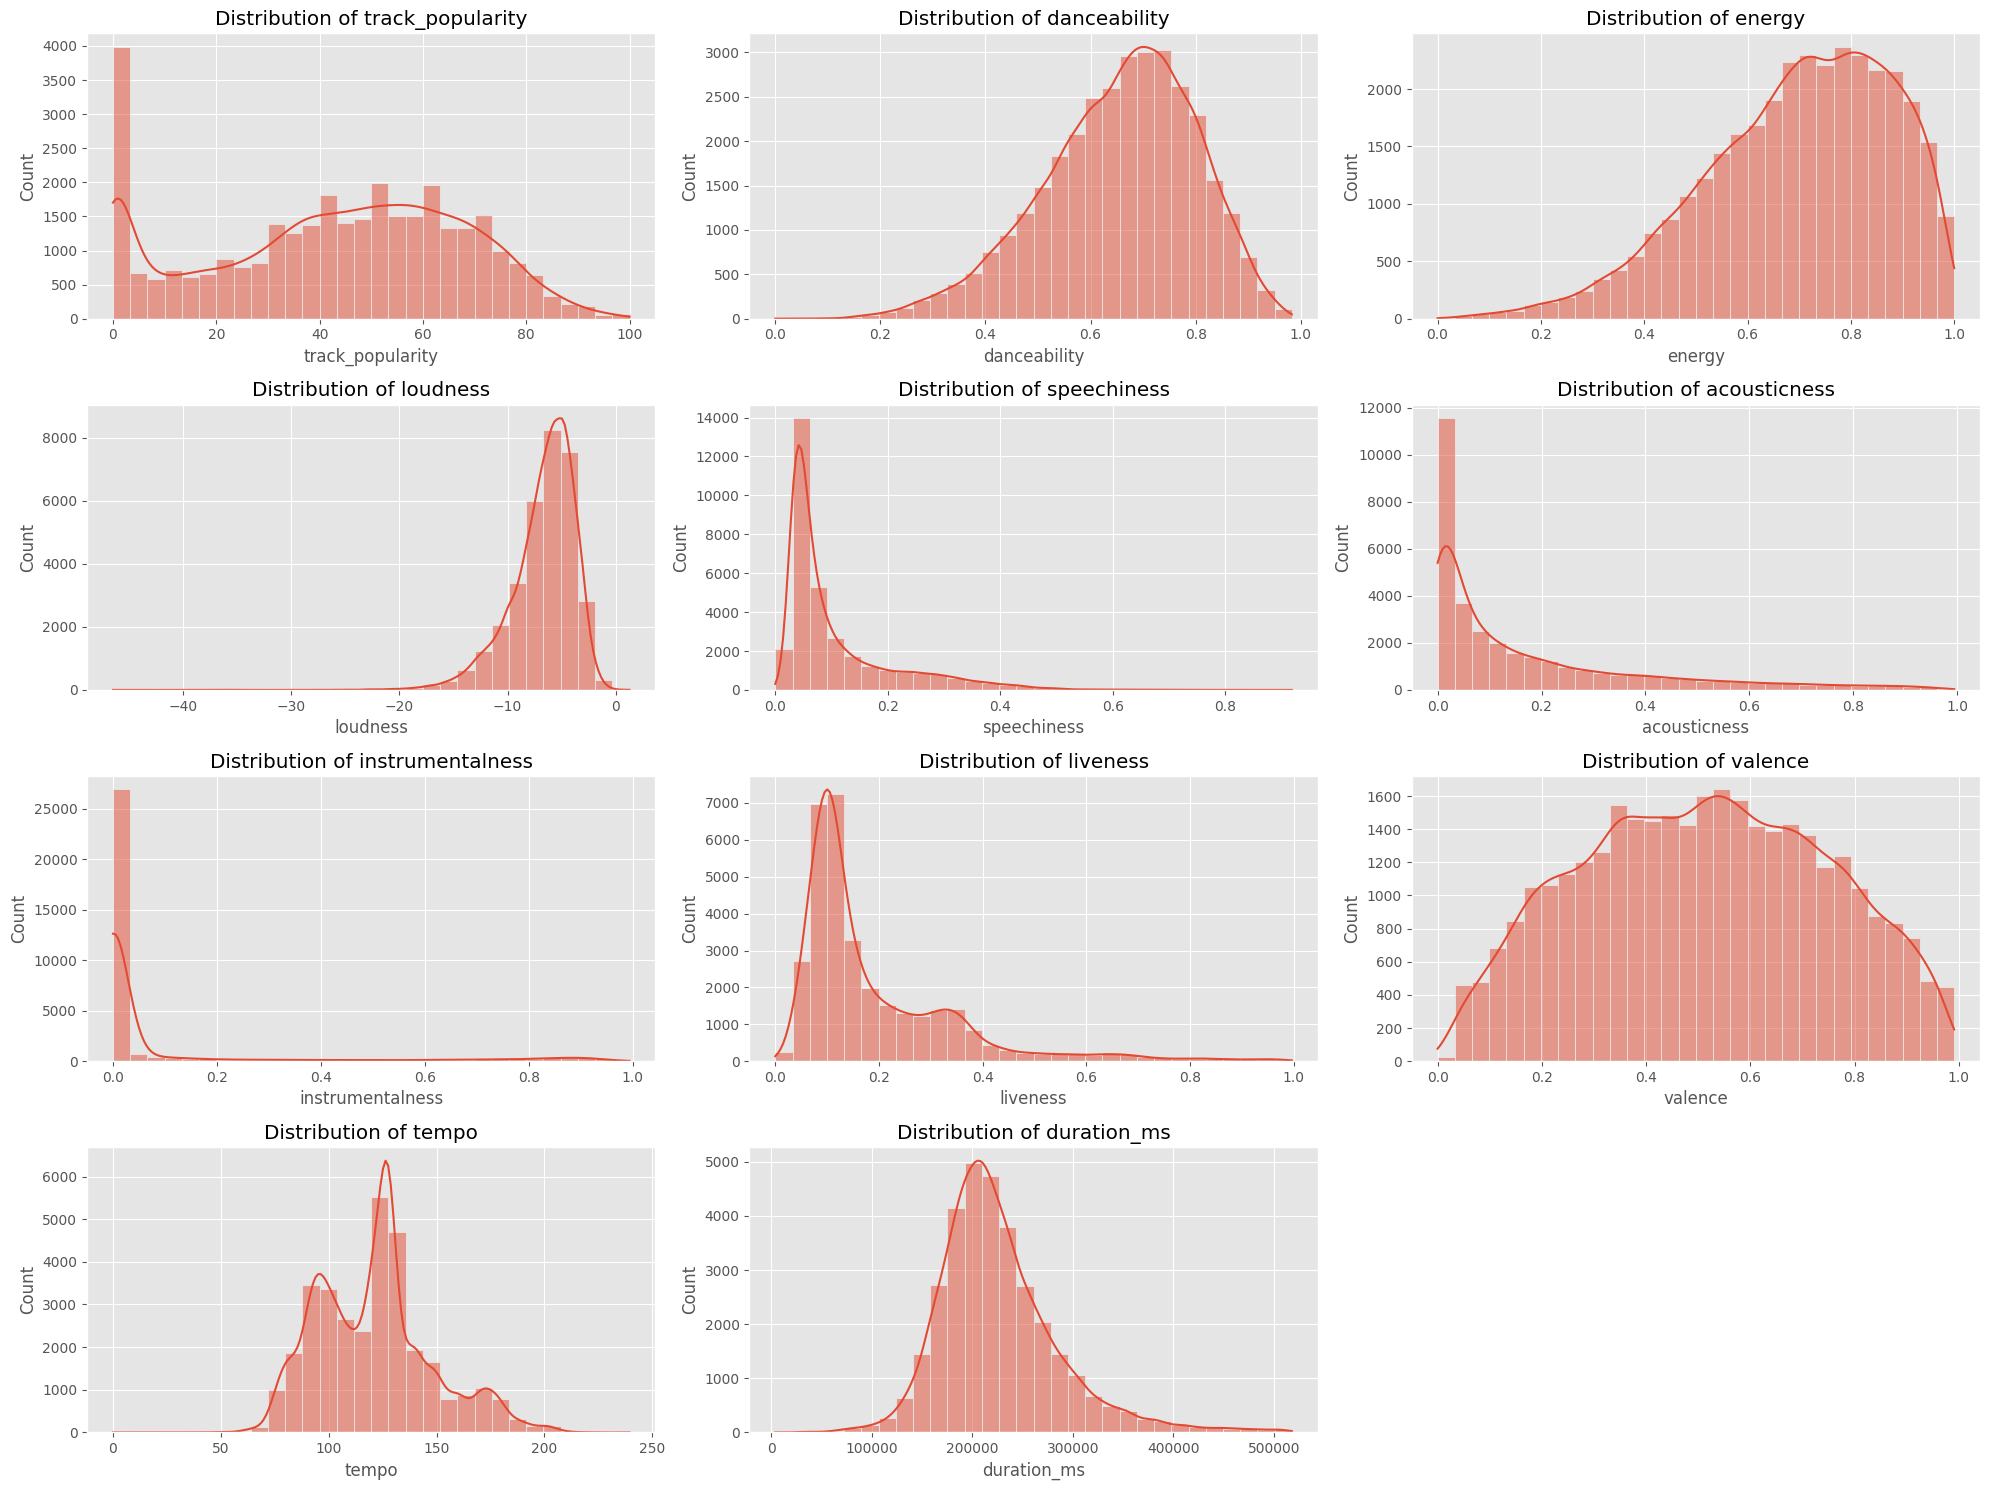

In [21]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_cols):
    plt.subplot(4, 3, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

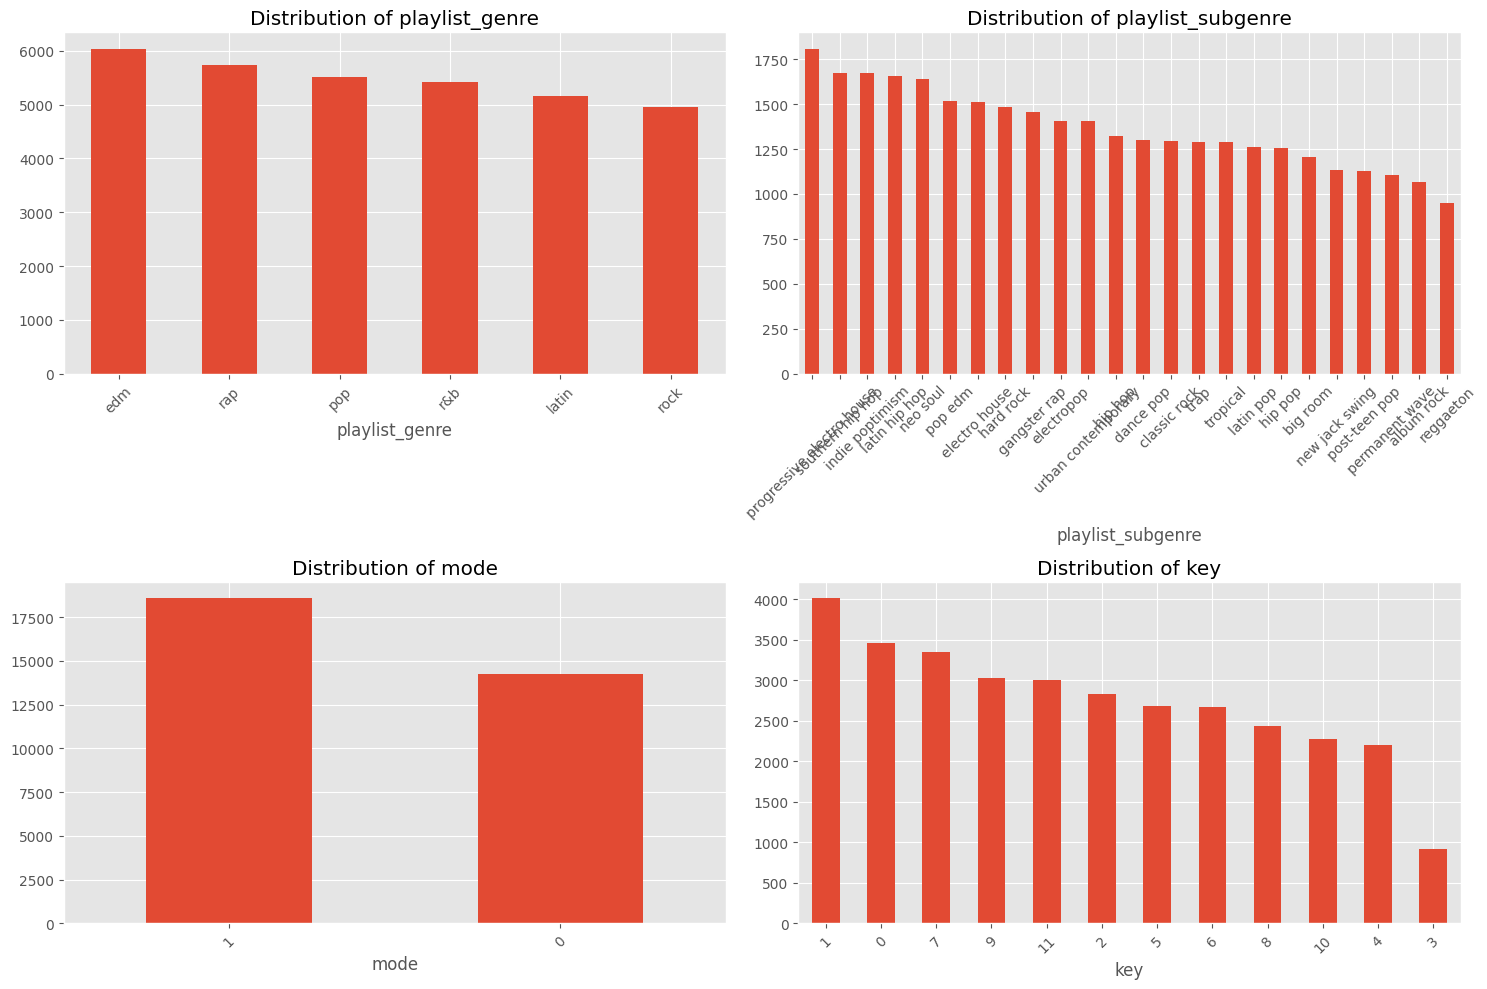

In [22]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 2, i+1)
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

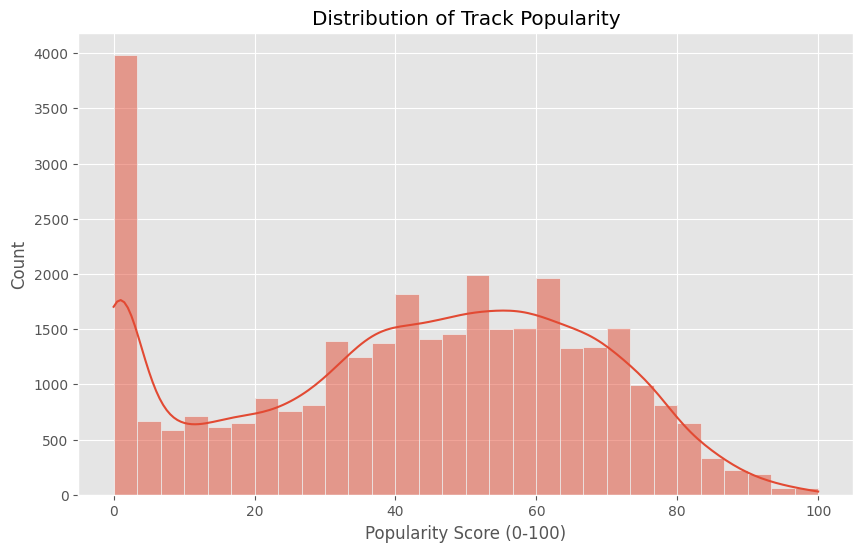

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df['track_popularity'], bins=30, kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity Score (0-100)')
plt.show()

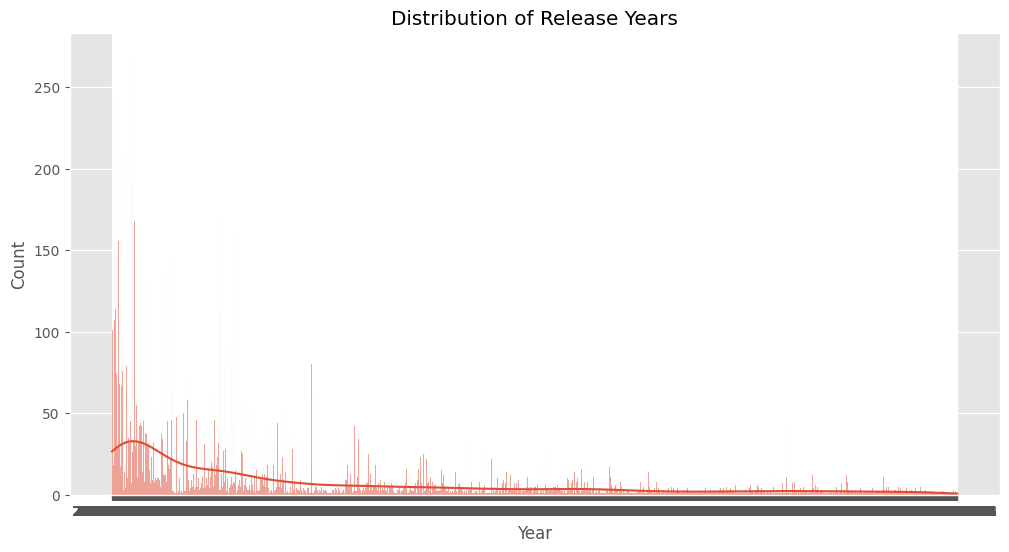

In [24]:
plt.figure(figsize=(12, 6))
sns.histplot(df['track_album_release_date'].dropna(), bins=30, kde=True)
plt.title('Distribution of Release Years')
plt.xlabel('Year')
plt.show()

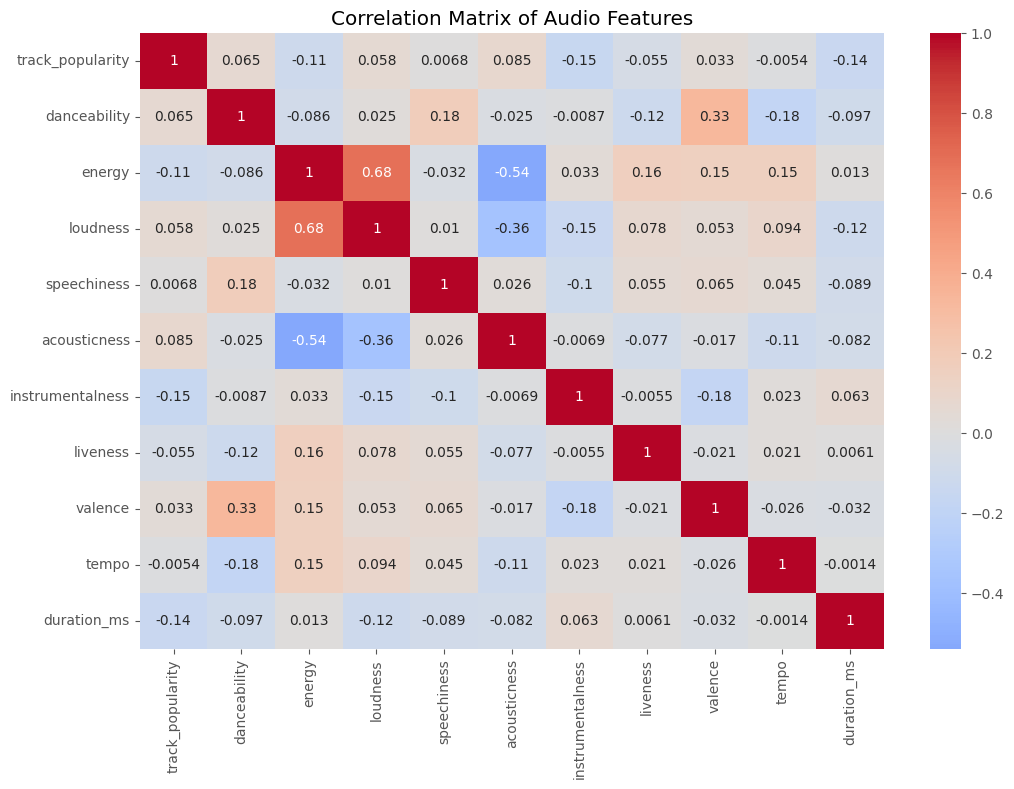

In [25]:
plt.figure(figsize=(12, 8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Audio Features')
plt.show()

ValueError: num must be an integer with 1 <= num <= 9, not 10

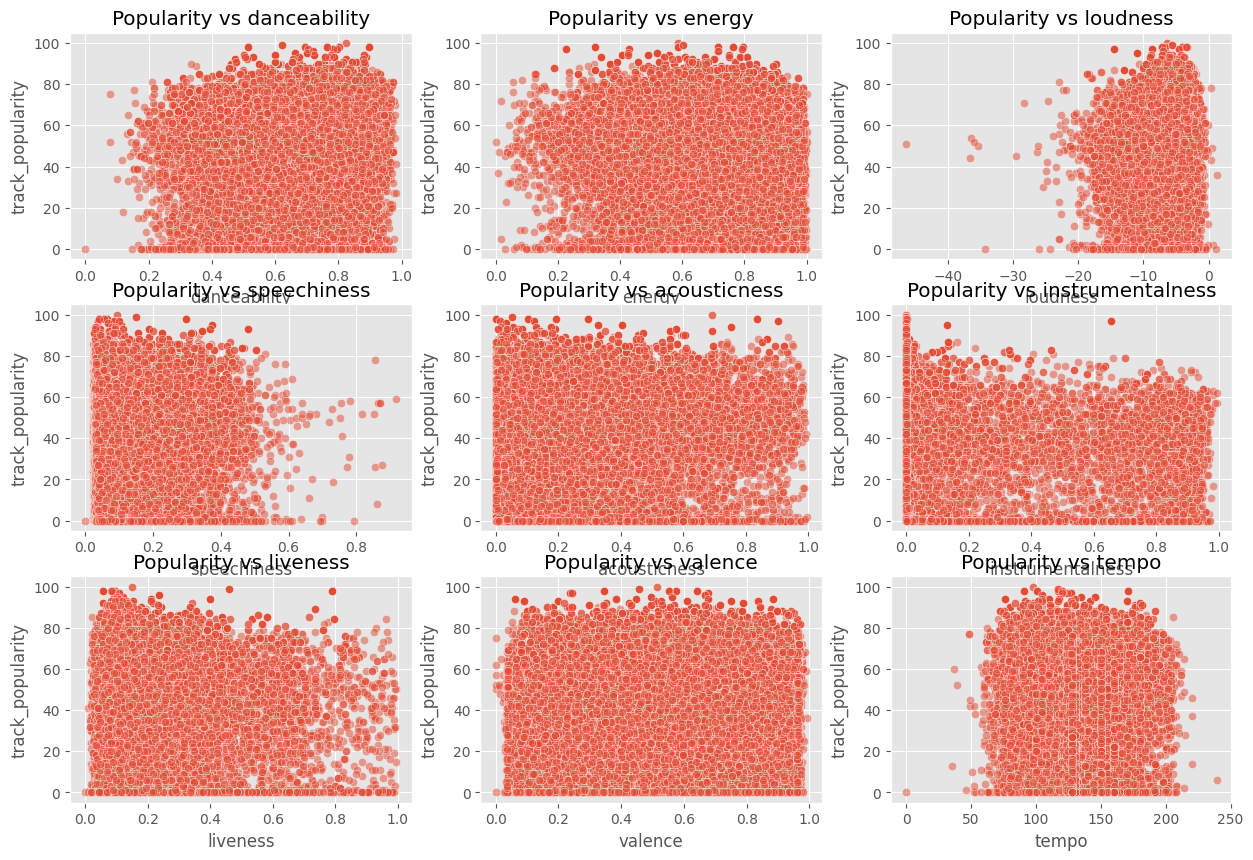

In [26]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols[1:]):  # Skip popularity itself
    plt.subplot(3, 3, i+1)
    sns.scatterplot(x=df[col], y=df['track_popularity'], alpha=0.5)
    plt.title(f'Popularity vs {col}')
plt.tight_layout()
plt.show()

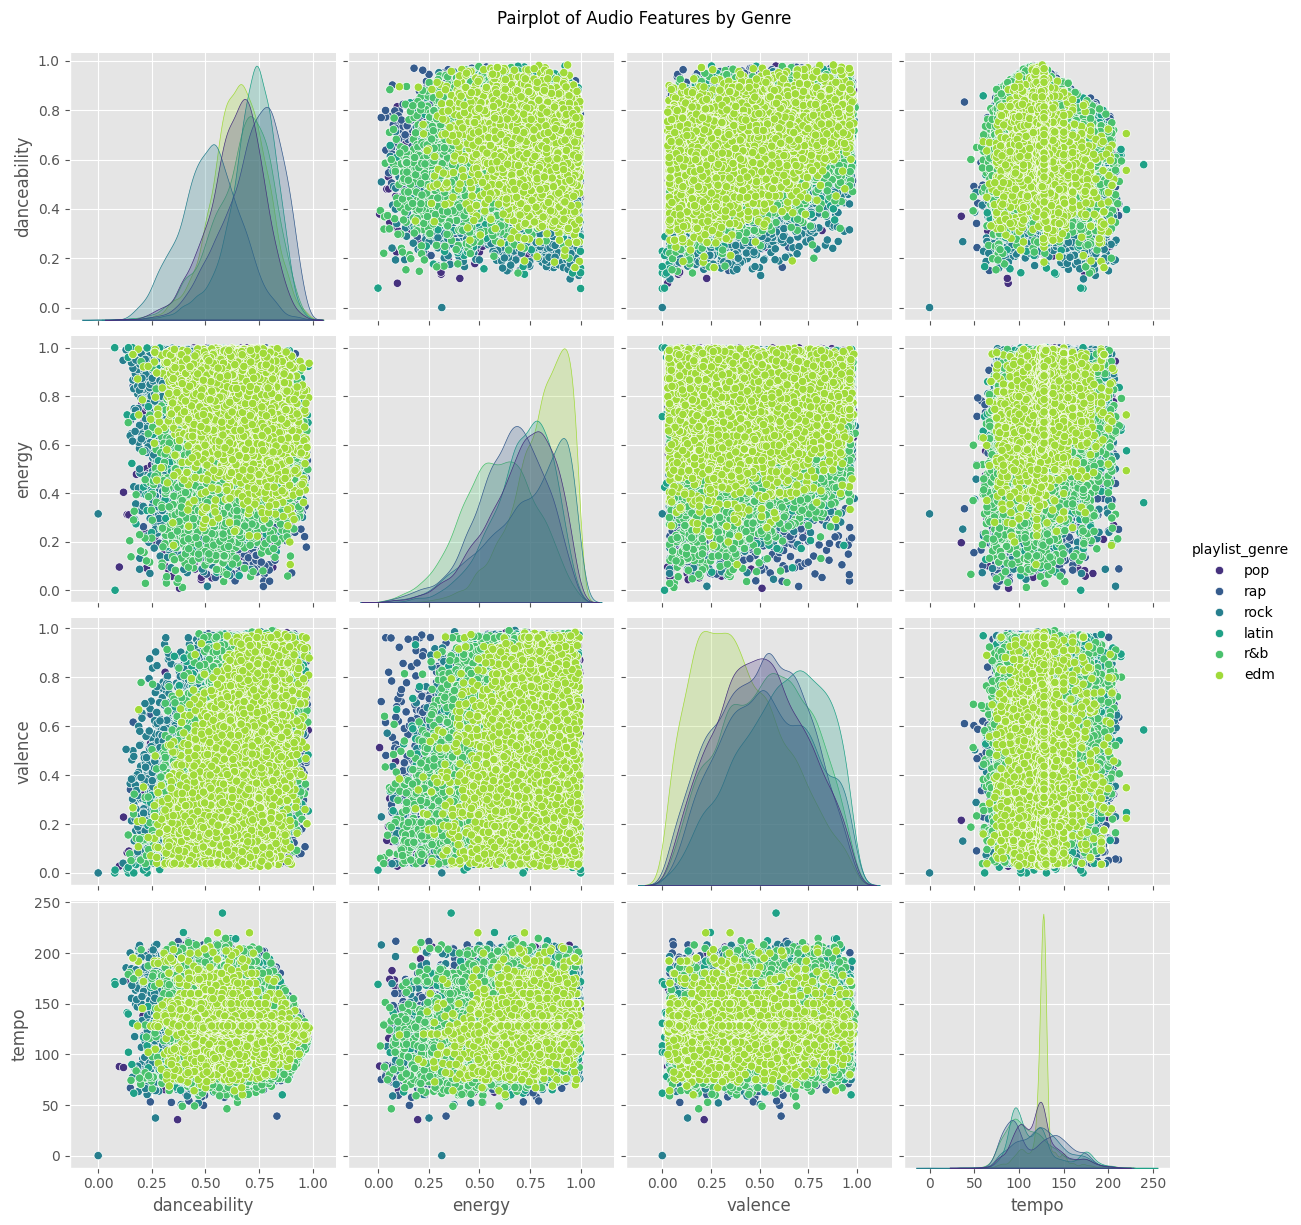

In [27]:
sns.pairplot(df[['danceability', 'energy', 'valence', 'tempo', 'playlist_genre']], 
             hue='playlist_genre', palette='viridis', height=3)
plt.suptitle('Pairplot of Audio Features by Genre', y=1.02)
plt.show()

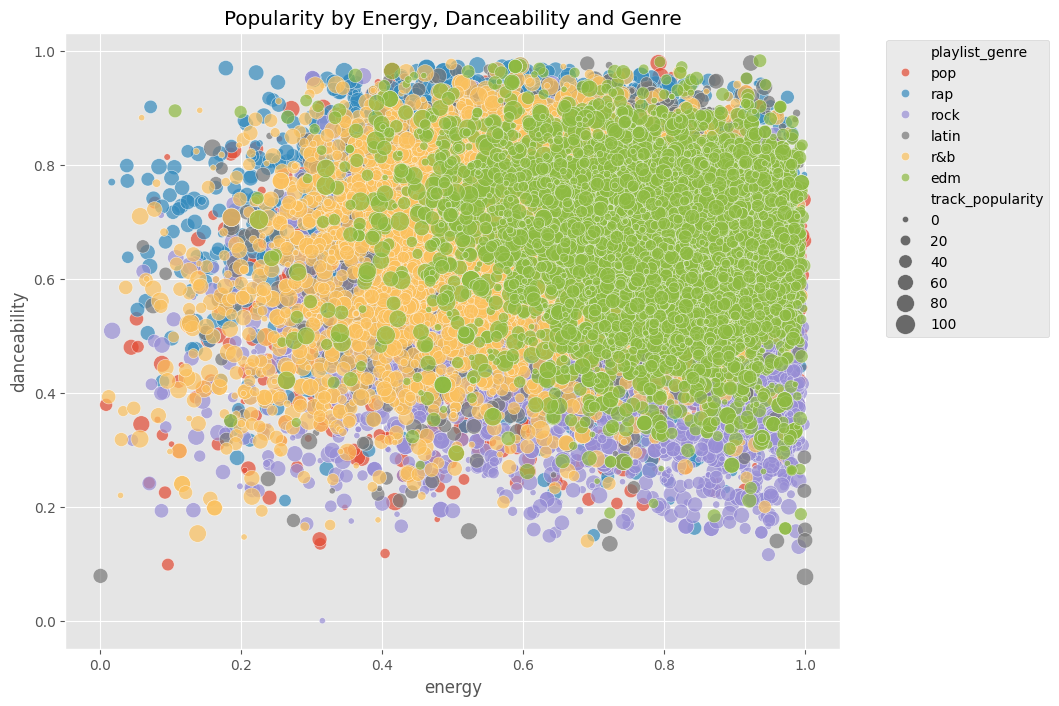

In [28]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='energy', y='danceability', size='track_popularity',
                hue='playlist_genre', sizes=(20, 200), alpha=0.7, data=df)
plt.title('Popularity by Energy, Danceability and Genre')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

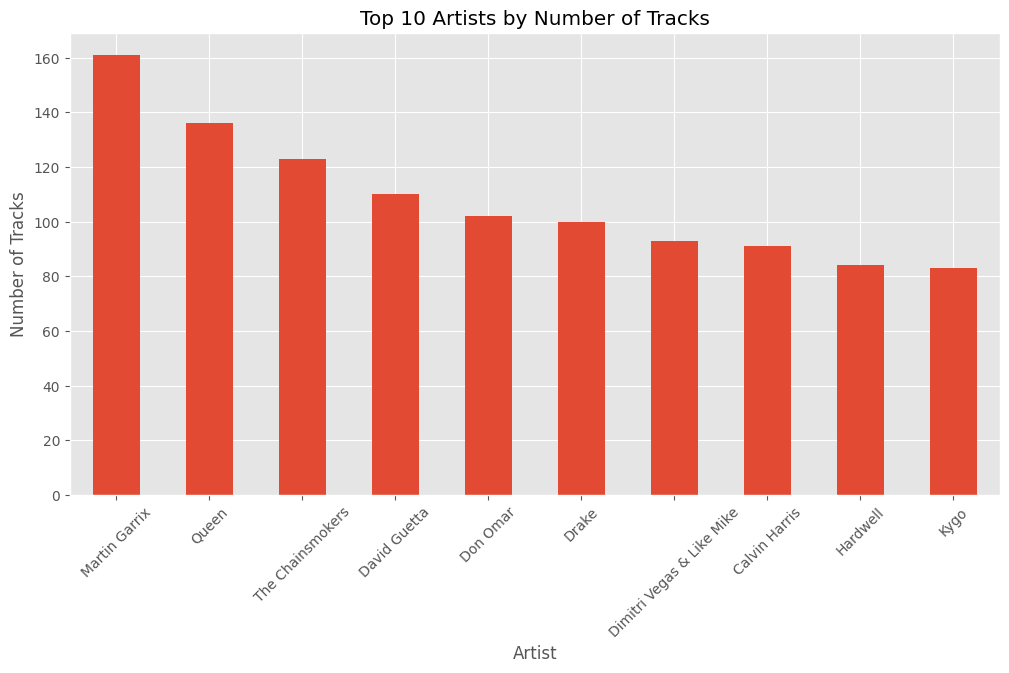

In [29]:
top_artists = df['track_artist'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_artists.plot(kind='bar')
plt.title('Top 10 Artists by Number of Tracks')
plt.xlabel('Artist')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45)
plt.show()

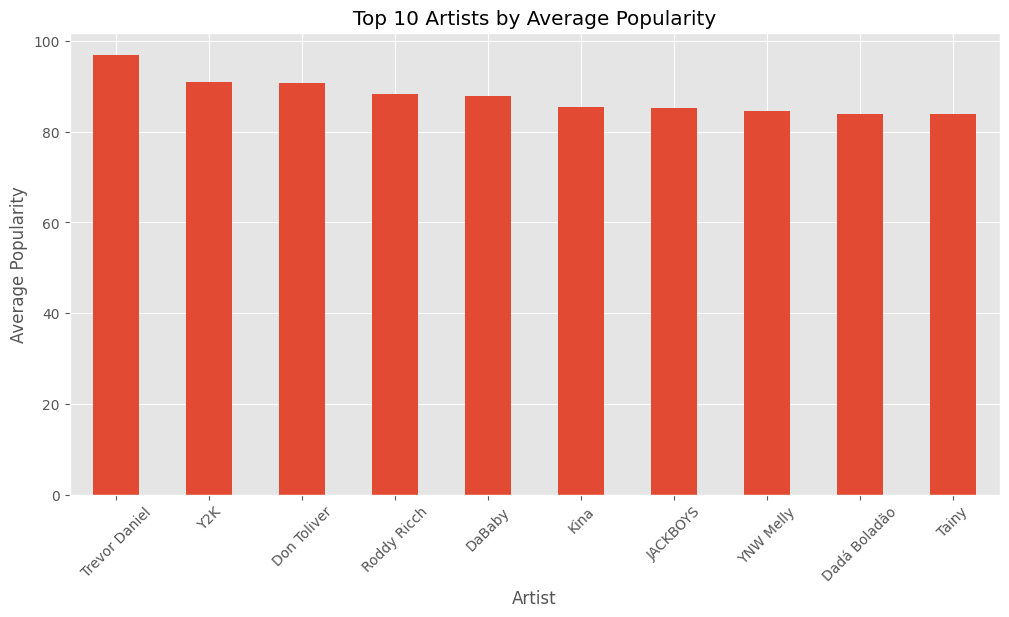

In [30]:
top_popular_artists = df.groupby('track_artist')['track_popularity'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_popular_artists.plot(kind='bar')
plt.title('Top 10 Artists by Average Popularity')
plt.xlabel('Artist')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)
plt.show()

In [31]:
top_tracks = df.sort_values('track_popularity', ascending=False).head(10)[['track_name', 'track_artist', 'track_popularity']]
print("Top 10 most popular tracks:")
top_tracks

Top 10 most popular tracks:


track_name    track_artist  track_popularity
20091  Dance Monkey     Tones and I               100
1551   Dance Monkey     Tones and I               100
23104       ROXANNE  Arizona Zervas                99
21468       ROXANNE  Arizona Zervas                99
30202       ROXANNE  Arizona Zervas                99
20092       ROXANNE  Arizona Zervas                99
11184       The Box     Roddy Ricch                98
19740       Circles     Post Malone                98
711        Memories        Maroon 5                98
687            Tusa         KAROL G                98

In [32]:
df['duration_min'] = df['duration_ms'] / 60000

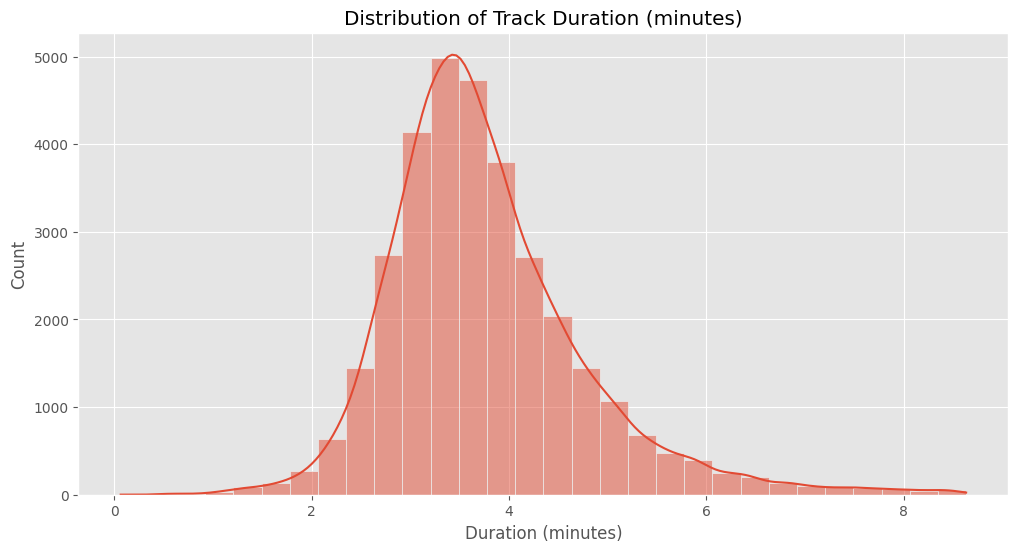

In [33]:
plt.figure(figsize=(12, 6))
sns.histplot(df['duration_min'], bins=30, kde=True)
plt.title('Distribution of Track Duration (minutes)')
plt.xlabel('Duration (minutes)')
plt.show()

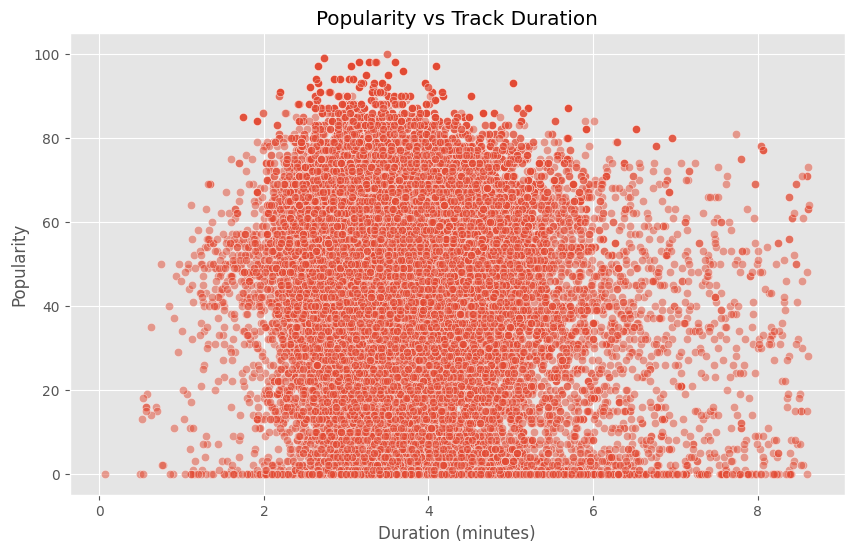

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration_min', y='track_popularity', data=df, alpha=0.5)
plt.title('Popularity vs Track Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Popularity')
plt.show()

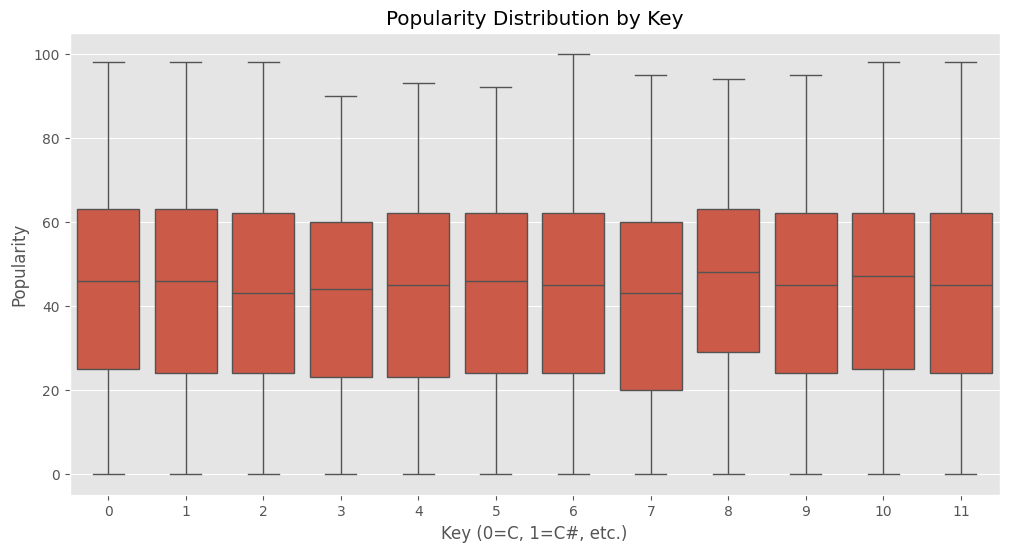

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='key', y='track_popularity', data=df)
plt.title('Popularity Distribution by Key')
plt.xlabel('Key (0=C, 1=C#, etc.)')
plt.ylabel('Popularity')
plt.show()

<Figure size 1200x600 with 0 Axes>

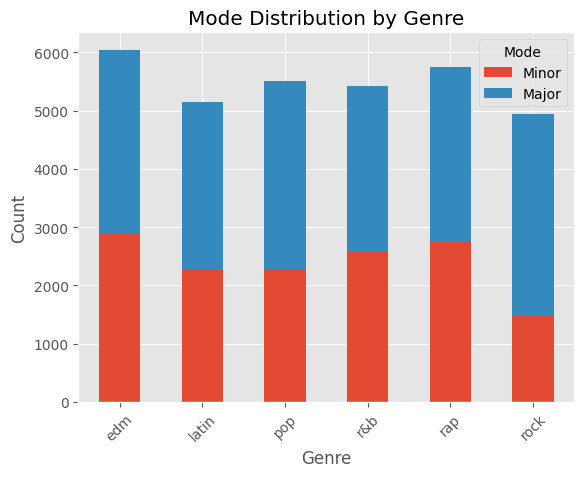

In [36]:
plt.figure(figsize=(12, 6))
pd.crosstab(df['playlist_genre'], df['mode']).plot(kind='bar', stacked=True)
plt.title('Mode Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Mode', labels=['Minor', 'Major'])
plt.show()

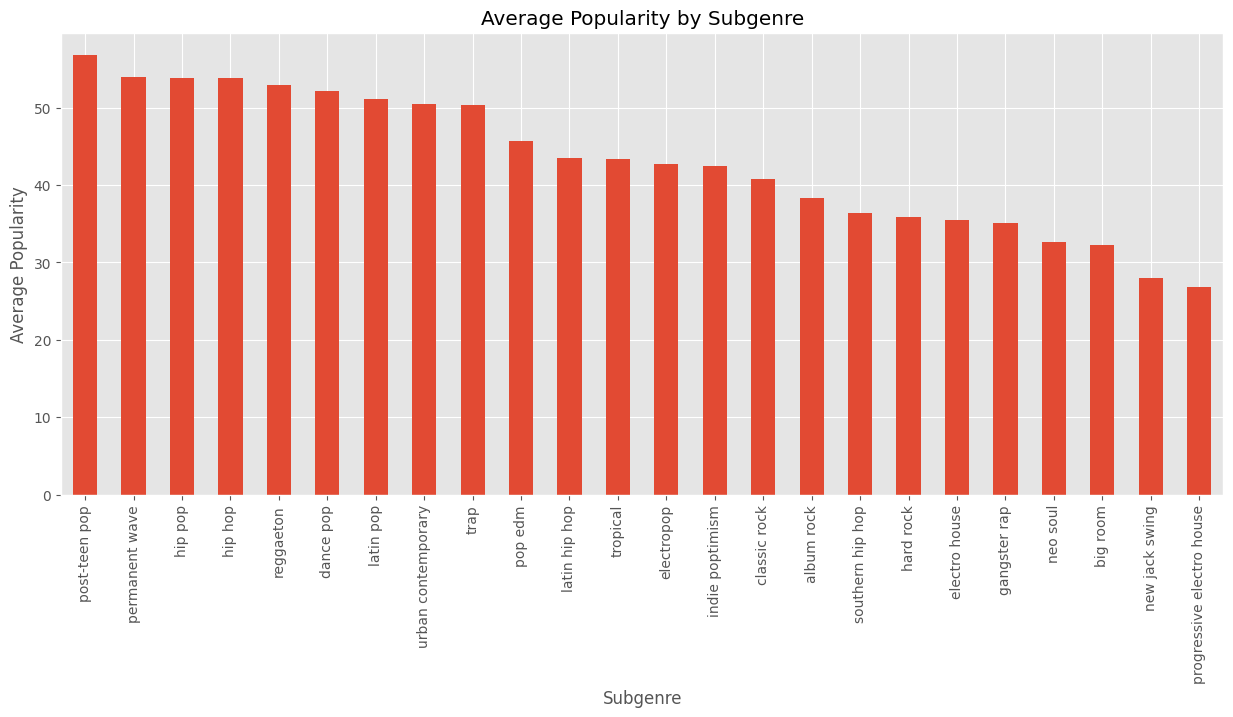

In [37]:
plt.figure(figsize=(15, 6))
df.groupby('playlist_subgenre')['track_popularity'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Average Popularity by Subgenre')
plt.xlabel('Subgenre')
plt.ylabel('Average Popularity')
plt.xticks(rotation=90)
plt.show()

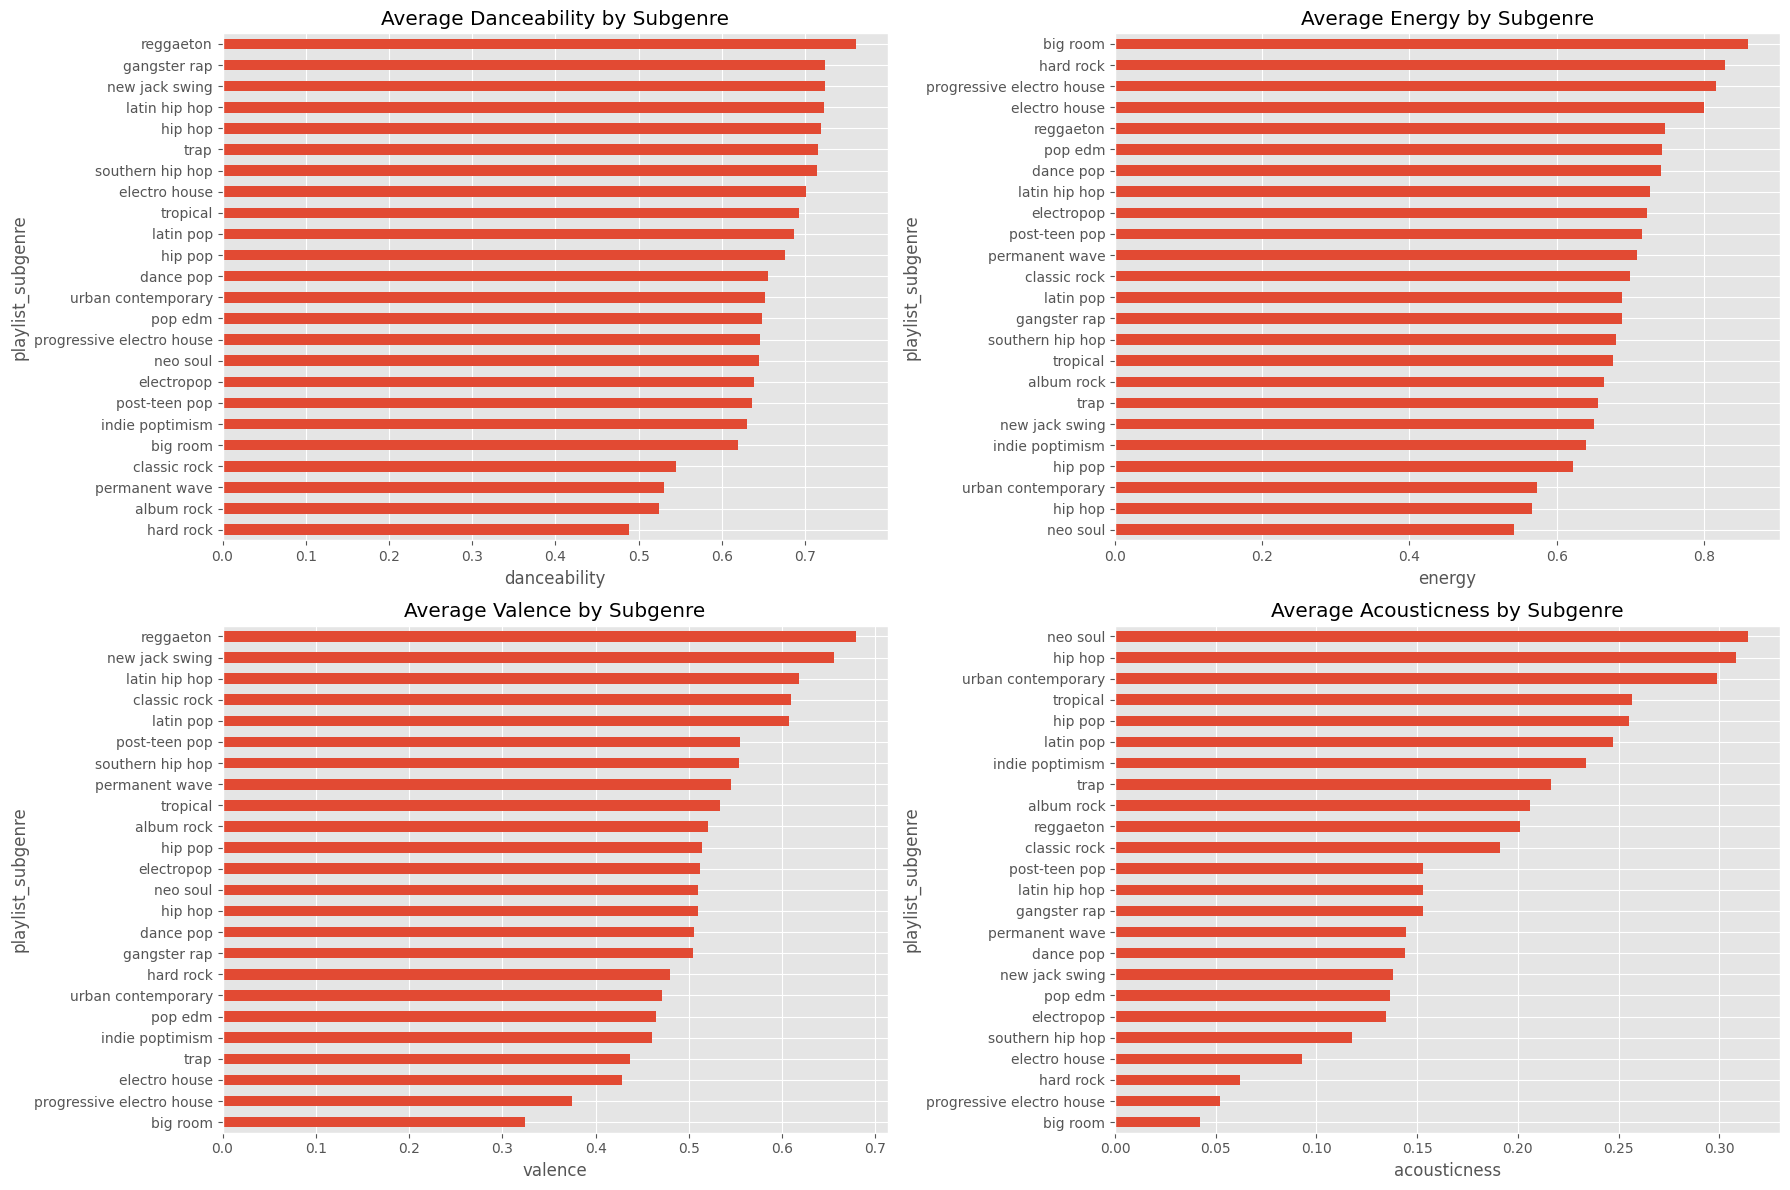

In [38]:
plt.figure(figsize=(18, 12))
features = ['danceability', 'energy', 'valence', 'acousticness']
for i, feat in enumerate(features):
    plt.subplot(2, 2, i+1)
    df.groupby('playlist_subgenre')[feat].mean().sort_values().plot(kind='barh')
    plt.title(f'Average {feat.capitalize()} by Subgenre')
    plt.xlabel(feat)
plt.tight_layout()
plt.show()

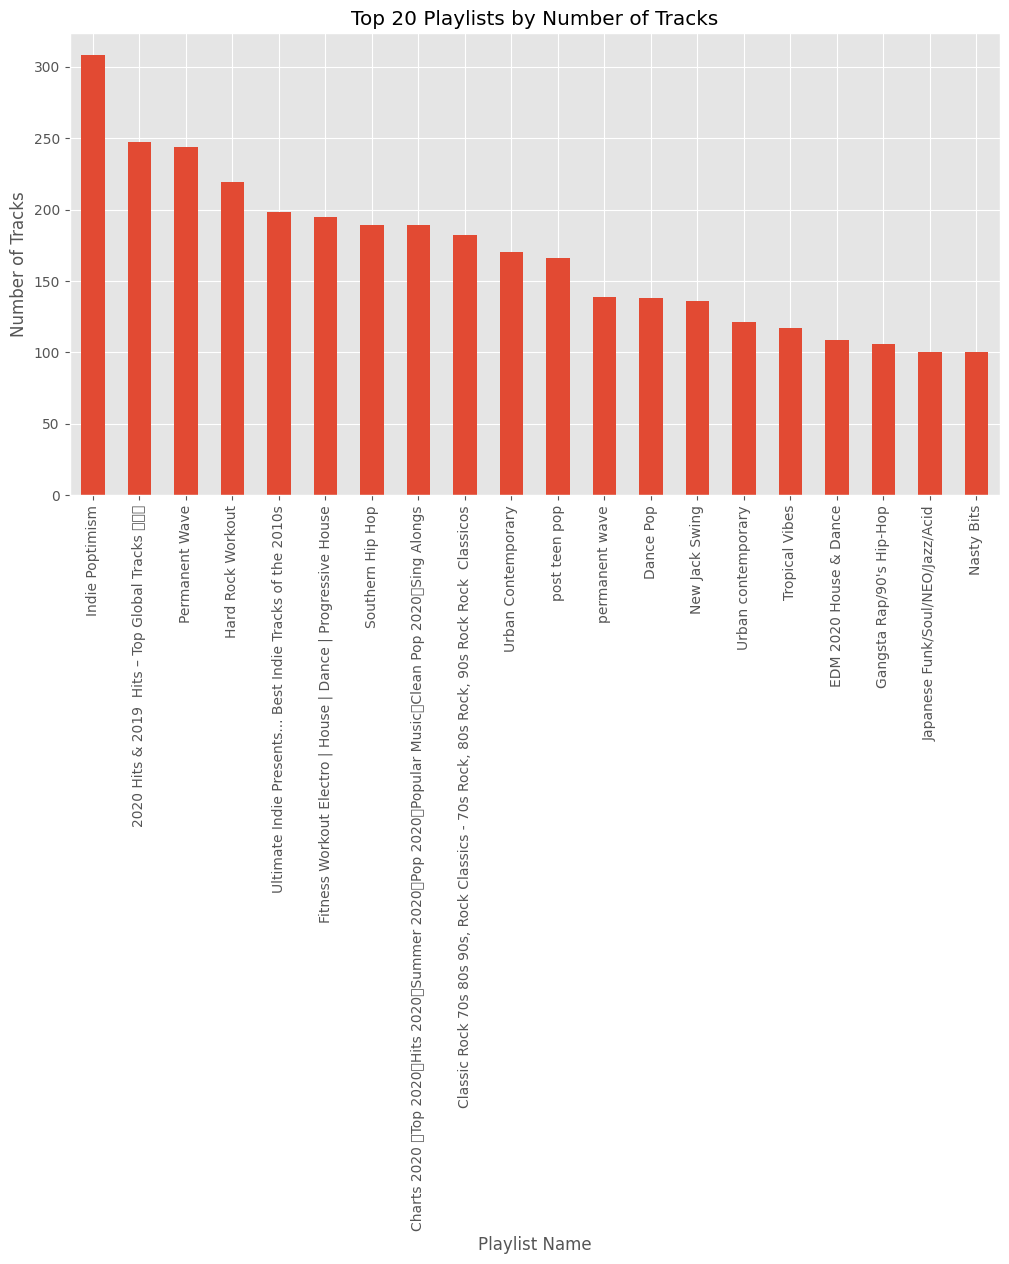

In [39]:
plt.figure(figsize=(12, 6))
df['playlist_name'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Playlists by Number of Tracks')
plt.xlabel('Playlist Name')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=90)
plt.show()

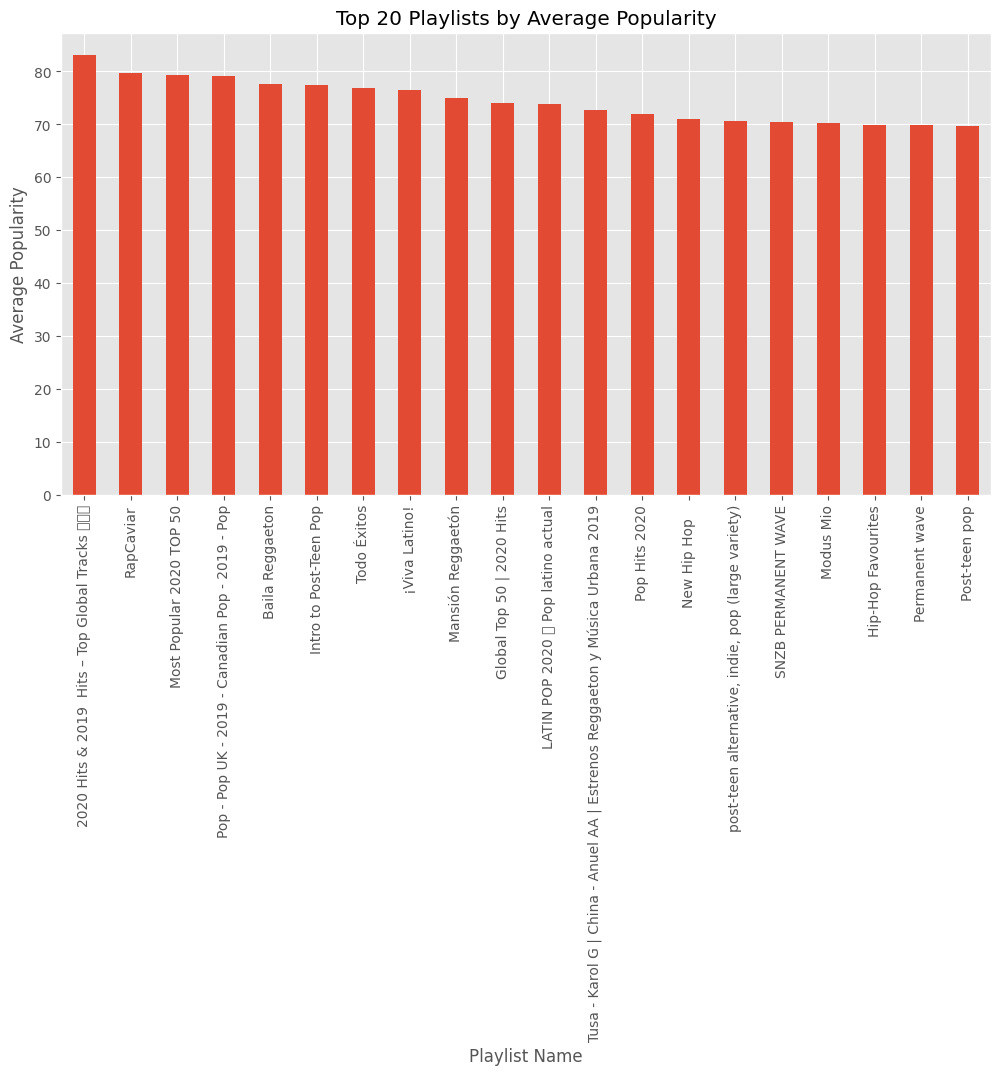

In [40]:
plt.figure(figsize=(12, 6))
df.groupby('playlist_name')['track_popularity'].mean().sort_values(ascending=False).head(20).plot(kind='bar')
plt.title('Top 20 Playlists by Average Popularity')
plt.xlabel('Playlist Name')
plt.ylabel('Average Popularity')
plt.xticks(rotation=90)
plt.show()

In [41]:
df.to_csv('processed_cleandata.csv', index=False)